In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Calculating Boolean Statistics

In [5]:
movie = pd.read_csv('data/movies.csv', index_col='movie_title')

In [6]:
"""
most dataframes do not hava boolean cols, and most 
boolean series are produced by applying a condition(using a comparison, perhaps) to a column.
"""

#lets create a boolean series by checking if a movie is longer than 2 hours.
movie_2_hours = movie['duration'] > 120
movie_2_hours.head()

movie_title
Avatar                                                      True
Pirates of the Caribbean: At World's End                    True
Spectre                                                     True
The Dark Knight Rises                                       True
Star Wars: Episode VII - The Force Awakens                 False
Name: duration, dtype: bool

In [11]:
#lets count the number of movies that are NOT longer than two hours
movie_2_hours.shape[0] - movie_2_hours.sum()

3976

In [12]:
#counting the fraction of movies longer than two hours could be found using 
print(movie_2_hours.sum() / movie_2_hours.shape[0])

#the better alternative
print(movie_2_hours.mean())

0.2115804084870117
0.2115804084870117


In [14]:
movie_2_hours.value_counts(normalize=True)

False    0.78842
True     0.21158
Name: duration, dtype: float64

In [19]:
#however this fraction calculation is wrong, since there are a lot of movies with missing values
#lets drop them and then recalculate this fraction
movie['duration'].dropna().gt(120).mean()

0.21221161495624502

In [20]:
movie_2_hours.describe()

count      5043
unique        2
top       False
freq       3976
Name: duration, dtype: object

In [30]:
actors = movie[['actor_1_facebook_likes', 'actor_2_facebook_likes']].dropna()
(actors['actor_1_facebook_likes'] > actors['actor_2_facebook_likes']).mean()
#for ~98% of the data, actor 1 has more facebook likes than actor 2 

0.9779324055666004

## 2. Constructing Multiple Boolean Conditions

In [31]:
criteria1 = (movie['imdb_score'] > 8)
criteria2 = (movie['content_rating'] == 'PG-13')
criteria3 = (movie['title_year'] < 2000) | (movie['title_year'] > 2009)

In [34]:
criteria_final = criteria1 & criteria2 & criteria3
criteria_final.sum()
#there are 24 such movies

24

## 3. Filtering with Boolean Indexing

In [36]:
criteria_final_1 = criteria1 & criteria2 & criteria3

crit1a = (movie['imdb_score'] < 5)
crit1b = (movie['content_rating'] == 'R')
crit1c = (movie['title_year'] >= 2000) & (movie['title_year'] <= 2010)
criteria_final_2 = crit1a & crit1b & crit1c

In [37]:
final_crit_all = criteria_final_1 | criteria_final_2
final_crit_all.sum(), criteria_final_1.sum() + criteria_final_2.sum()

(89, 89)

In [44]:
#we just made a custom filter! you can now pass the dataframe throught this custom filter.
#the filtrate would be the movies that satisfy the criteria.
movie[final_crit_all].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


In [48]:
#its not easy to see from this dataframe if the filters performs in the desired fashion
#lets change that
cols = ['imdb_score', 'content_rating', 'title_year']
filtered_cols = movie.loc[final_crit_all, cols] #df.loc[custom_filter, cols to "manually skim through"]
filtered_cols.head(8) #looks like our custom filter did the work it was supposed to!

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
Inception,8.8,PG-13,2010.0
The Martian,8.1,PG-13,2015.0
Town & Country,4.4,R,2001.0


## 4. Replicating Boolean Indexing with Index Selection

In [50]:
#index selection could prove to be more readable and intuitive
college = pd.read_csv('data/college.csv')
college[college['STABBR'] == 'TX'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [51]:
#lets replicate this with index selection
#first make the STABBR column as the index
college2 = college.set_index('STABBR')
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [52]:
%timeit college[college['STABBR'] == 'TX']

100 loops, best of 3: 6.78 ms per loop


In [53]:
#this method comes out to be faster as well
%timeit college2.loc['TX']

100 loops, best of 3: 3.49 ms per loop


In [56]:
#we could also check filter out multiple states
states = ['TX', 'CA', 'NY']
#boolean indexing ==> use the isin method
college[college['STABBR'].isin(states)].shape

(1704, 27)

In [57]:
#for index selection, pass in the list of states to the loc indexor
college2.loc[states].shape

(1704, 26)

## 5. Selecting with Unique and Sorted Indexes

In [60]:
#index selection from the previous section can be sped up by sorted/unique index values

#lets check if the index is sorted for college2
college2.index.is_monotonic

False

In [63]:
#lets sort the index col
college3 = college2.sort_index()
college3.index.is_monotonic

True

In [64]:
#we see a drastic improvement in speed in comparison to boolean indexing
#and significant improvement in comparison to the first draft of index selection
%timeit college3.loc['TX']

The slowest run took 15.87 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 966 µs per loop


In [66]:
#in the above example, the values in STABBR were not unique
#lets turn to an index col with unique values
college_unique = college.set_index('INSTNM')
college_unique.index.is_unique

True

In [67]:
#unique - pandas implements hash table, hence faster
#sorted - faster because binary search is now possible
%timeit college[college['INSTNM'] == 'Stanford University']

100 loops, best of 3: 6.82 ms per loop


In [68]:
%timeit college_unique.loc['Stanford University']
#very fast indeed!

1000 loops, best of 3: 579 µs per loop


## 6. Gaining Perspective on Stock Prices

In [72]:
#reading in the Schlumberger Stock prices
stock = pd.read_csv('data/slb_stock.csv', index_col = 'Date', parse_dates=['Date'])
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [77]:
#parse_dates converted the date from an normal index to a datetime index
type(stock.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [80]:
slb_close = stock['Close']
slb_summary = slb_close.describe(percentiles=[0.1, 0.9])
slb_summary #this is a series with identifying statistic as the index label

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [81]:
#lets use boolean indexing to choose the highest or lowest 10th percentile
upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
#making a filter to filter out the lower and upper 10 percentile of stock values
criteria = (slb_close < lower_10) | (slb_close > upper_10)
#passing the df through our filter, to get the values that satisfy the criteria
slb_top_bottom_10 = slb_close[criteria]

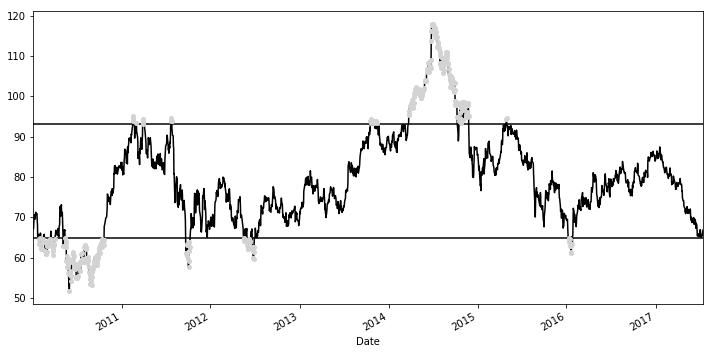

In [87]:
slb_close.plot(color='black', figsize=(12,6))
#style = ' ', so that no line is drawn
slb_top_bottom_10.plot(marker='o', style=' ', ms=4, color='lightgray')

xmin = criteria.index[0]
xmax = criteria.index[-1]
"""
matplotlib has the following function that draws horizontal lines at the given y values, 
from xmin to xmax, with the color that you specify
"""
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax, color='black')

#therefore, from the plot, closing price has been above $93 only for about 10% of the time in the last 7 years.

In [88]:
xmin, xmax

(Timestamp('2010-01-04 00:00:00'), Timestamp('2017-07-14 00:00:00'))

In [94]:
#lets do the same for opening prices (it's just practice!)
opening = stock['Open']
open_desc = opening.describe(percentiles=[0.05, 0.95])
#creating filter
criteria = (opening < open_desc['5%']) | (opening > open_desc['95%'])
open_top_bottom_10 = opening[criteria]

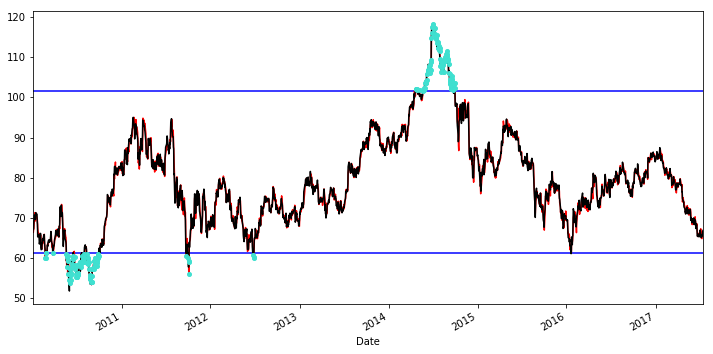

In [107]:
opening.plot(color='red', figsize=(12, 6))
slb_close.plot(color='black')
open_top_bottom_10.plot(marker='o', style=' ', ms=4, color='turquoise')

#xmin and xmax contains the minimum and maximum values of the index, which here is a datetime index.
xmin = criteria.index[0]
xmax = criteria.index[-1]

plt.hlines(y=[open_desc.loc['5%'], open_desc.loc['95%']], xmin=xmin, xmax=xmax, color='blue')

## 7. Translating SQL Where Clauses

In [110]:
#writing pandas code that is equivalent to SQL queries.
"""
pandas has the ability to connect to SQL databases, and
send SQL statements to them.
"""
employee = pd.read_csv('data/employee.csv')

In [112]:
employee.head()
#the condition in the sql query is "all female employee who is either a police officer or fire fighter,
#                                  "with a base salary between 80,000 and 1,20,000

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


In [114]:
#lets look at the unique values in the dept. as it is present in the where clause
employee.DEPARTMENT.value_counts().head()
#nice! We've got the labels needed for police and fire fighters

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [120]:
employee.BASE_SALARY.describe().astype(int)

count      1886
mean      55767
std       21693
min       24960
25%       40170
50%       54461
75%       66614
max      275000
Name: BASE_SALARY, dtype: int32

In [126]:
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
criteria_dept = employee['DEPARTMENT'].isin(depts)
criteria_gender = employee['GENDER'] == 'Female'
criteria_base = (employee['BASE_SALARY'] >= 80000) & (employee['BASE_SALARY'] <= 120000)

In [137]:
#so translating SQL where clause is just like combining multiple conditions in boolean_filtering
criteria_final = criteria_dept & criteria_gender & criteria_base
cols = ['DEPARTMENT', 'GENDER', 'BASE_SALARY']
employee.loc[criteria_final, cols].head()

,DEPARTMENT,GENDER,BASE_SALARY
61,Houston Fire Department (HFD),Female,96668.0
136,Houston Police Department-HPD,Female,81239.0
367,Houston Police Department-HPD,Female,86534.0
474,Houston Police Department-HPD,Female,91181.0
513,Houston Police Department-HPD,Female,81239.0


## 8. Determining the Normality of Stock Market Returns

In [5]:
amzn = pd.read_csv('data/amzn_stock.csv', index_col='Date', parse_dates=['Date'])
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


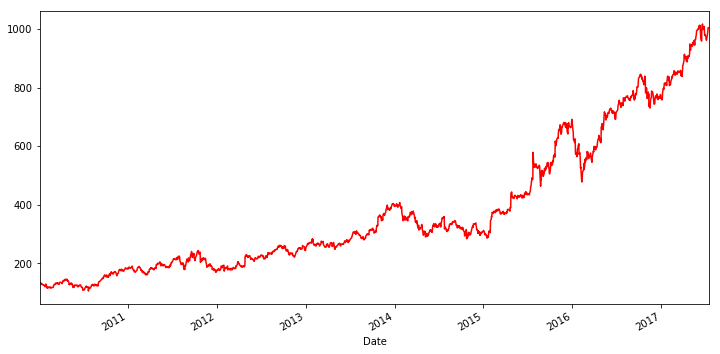

In [6]:
amzn_opening = amzn['Open']
amzn_opening.plot(color='red', figsize=(12,6))

In [8]:
#lets find the daily returns by finding the percentage changes.
amzn_daily_return = amzn['Close'].pct_change()
amzn_daily_return.head()

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

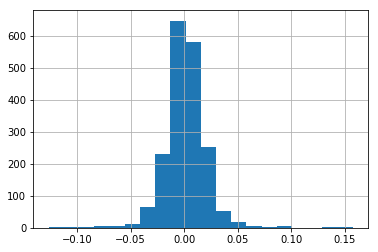

In [12]:
#we'll drop the missing values, and plot a histogram
amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return.hist(bins=20)

#we see that the plot is symmetric, but we're not sure of its normality yet

In [13]:
#lets ascertain normality by checking the 68-95-99.7% rule calculator

#lets find the absolute z score for each value
#the z score is the number of standard deviations away from the mean
mean = amzn_daily_return.mean()
std = amzn_daily_return.std()
abs_z_score = amzn_daily_return.sub(mean).abs().div(std)

In [17]:
crit_1sd = (abs_z_score <= 1)
crit_2sd = (abs_z_score <= 2)
crit_3sd = (abs_z_score <= 3)

In [18]:
crit_1sd.mean(), crit_2sd.mean(), crit_3sd.mean()

(0.7873350923482849, 0.9562005277044855, 0.9846965699208443)

In [22]:
#alternate way to do the above (also more efficient)
def check_normality(data):
    fractions = [data.lt(x).mean() for x in range(1,4)]
    print("The fraction of values that fall within 1 sd : {} , 2sd : {}, 3sd : {}".format(fractions[0], fractions[1], fractions[2]))

In [23]:
check_normality(abs_z_score)

The fraction of values that fall within 1 sd : 0.7873350923482849 , 2sd : 0.9562005277044855, 3sd : 0.9846965699208443


In [24]:
#since the fractions deviate significantly for 1sd and 3sd, 
#we can conclude that amazon daily stock returns do not follow normal distribution

## 9. Improve Readability of Boolean Indexing with Query Method

In [25]:
#same as section 7, but now using the built in Query Method
#HOWEVER IT MUST NOT BE USED IN PRODUCTION CODE, since it is not as capable as boolean indexing
employee = pd.read_csv('data/employee.csv')
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
cols = ['DEPARTMENT', 'GENDER', 'BASE_SALARY']

In [27]:
#the query string. It is possible to reference python vars with the @ symbol
qs = "DEPARTMENT in @depts " \
        " and GENDER == 'Female' " \
        " and 80000 <= BASE_SALARY <= 120000"

#emp_filtered contains all the cols for the filtered data points
emp_filtered = employee.query(qs)
emp_filtered[cols].head()

,DEPARTMENT,GENDER,BASE_SALARY
61,Houston Fire Department (HFD),Female,96668.0
136,Houston Police Department-HPD,Female,81239.0
367,Houston Police Department-HPD,Female,86534.0
474,Houston Police Department-HPD,Female,91181.0
513,Houston Police Department-HPD,Female,81239.0


In [42]:
#finding the total number of female employees, who are not part of the top 10 depts
top10_depts = employee['DEPARTMENT'].value_counts().index[:10].tolist()

qs2 = "DEPARTMENT not in @top10_depts and GENDER == 'Female'"
emp_filtered2 = employee.query(qs2)
emp_filtered2[['DEPARTMENT', 'GENDER']].head()

,DEPARTMENT,GENDER
0,Municipal Courts Department,Female
73,Human Resources Dept.,Female
96,City Controller's Office,Female
117,Legal Department,Female
146,Houston Information Tech Svcs,Female


## 10. Preserving Series with The WHERE Method

In [99]:
fb_likes = movie['actor_1_facebook_likes'].dropna()
fb_likes.describe(percentiles=[0.1, 0.25, 0.75, 0.9]).astype(int)
#shows that the values are highly skewed to the right, with many observations
#more than an order of magnitude

count      5036
mean       6560
std       15020
min           0
10%         248
25%         614
50%         988
75%       11000
90%       18500
max      640000
Name: actor_1_facebook_likes, dtype: int32

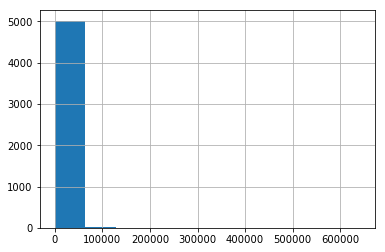

In [100]:
#not that useful since most values are dumped into a single bin
fb_likes.hist()

In [103]:
crit_likes = fb_likes < 20000
crit_likes.mean().round(2)

0.91

In [104]:
#running the where method which accepts a boolean condition
#the default behaviour is to output a series with the same size as the input
#(with all the false locations replaced with missing value)
fb_likes.where(crit_likes).head()

movie_title
Avatar                                                      1000.0
Pirates of the Caribbean: At World's End                       NaN
Spectre                                                    11000.0
The Dark Knight Rises                                          NaN
Star Wars: Episode VII - The Force Awakens                   131.0
Name: actor_1_facebook_likes, dtype: float64

In [105]:
#we can control this replacement value with the second argument of where
fb_likes.where(crit_likes, other=20000).head()
#where are capping any movie with more likes at 20K likes

movie_title
Avatar                                                      1000.0
Pirates of the Caribbean: At World's End                   20000.0
Spectre                                                    11000.0
The Dark Knight Rises                                      20000.0
Star Wars: Episode VII - The Force Awakens                   131.0
Name: actor_1_facebook_likes, dtype: float64

In [112]:
#we can chaing multiple where conditions
crit_low_likes = fb_likes > 300
#no movie would have lesser than 300 likes after the following command
fb_likes_tighter = fb_likes.where(crit_likes, other=20000).where(crit_low_likes, other=300)

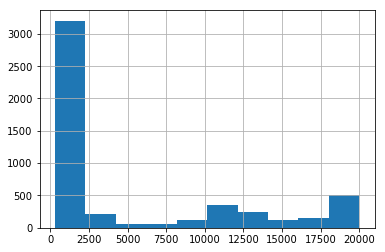

In [114]:
#now that the values are more tightly packed, we expect a better histogram that before
fb_likes_tighter.hist()

#and sure enough, we do!

In [115]:
fb_likes_2 = fb_likes.clip(lower=300, upper=20000)
fb_likes_2.equals(fb_likes_tighter)

True

## 11. Masking Dataframe Rows

In [50]:
#mask does the oppposite of where, it creates missing values for all datapoints that satisfy the condition
movie = pd.read_csv('data/movies.csv', index_col='movie_title')
c1 = movie['title_year'] >= 2010
c2 = movie['title_year'].isnull()
criteria = c1 | c2

In [55]:
movie_masked = movie.mask(criteria).dropna()

In [61]:
#we can do the same with boolean indexing
movie2 = movie[movie['title_year'] < 2010].dropna()
movie2.equals(movie_masked)
#however, this does not seem to be the case

False

In [62]:
#the reason is, for masking, the missing values created are float dtypes. And column might have been int datatype intially.
#there is a method, mostly used by developers(for testing) in these situations.
from pandas.testing import assert_frame_equal
assert_frame_equal(movie_masked, movie2, check_dtype=False)

#no output is good: this means the dfs are equal

## 12. Selecting with Booleans, Integer Location, and Labels

In [64]:
#loc and iloc can select using booleans, eventhough they are neither integers nor labels
c1 = movie['content_rating'] == 'G'
c2 = movie['imdb_score'] < 4
criteria = c1 &  c2

In [71]:
a = criteria.values
a[:5]

array([False, False, False, False, False])

In [77]:
movie_loc = movie.loc[criteria]
movie_loc.shape, movie_loc.equals(movie[criteria])

((6, 27), True)

In [85]:
# movie.iloc[criteria] #raises an error
movie.iloc[criteria.values].shape

(6, 27)

In [89]:
#lets make a filter that chooses all cols with the dtype int64
crit_cols = movie.dtypes == np.int64
crit_cols.head()

color                      False
director_name              False
num_critic_for_reviews     False
duration                   False
director_facebook_likes    False
dtype: bool

In [93]:
#applying our column filter to the dataframe
movie.loc[:, crit_cols].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [95]:
#the above result can be replicated with the following command as well.
movie.select_dtypes(include=[np.int64]).head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [96]:
#replicated again with iloc
movie.iloc[:, crit_cols.values].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0
